In [ ]:
# Code to be added in console for runnning colab continuosly - cell not to be ran on colab

function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

# Data Loading

In [25]:
import os
import numpy as np

def load_input_data(storage_folder, num):
	
  if (num==4):
    x_data_file = 'x_data_4.npy'
  elif (num==8):
    x_data_file = 'x_data_8.npy'
  elif (num==16):
    x_data_file = 'x_data_16.npy'
  elif (num==32):
    x_data_file = 'x_data_32.npy'
  elif (num==64):
    x_data_file = 'x_data_64.npy'
    
  x_data_path = os.path.join(storage_folder, x_data_file)
  x_data = np.load(x_data_path)
    
  return x_data

def load_output_data(storage_folder):

  y_labels_file = 'y_labels.npy'
  y_labels_path = os.path.join(storage_folder, y_labels_file)
  y_labels = np.load(y_labels_path)
    
  return y_labels

In [63]:
from google.colab import drive

drive.mount('/gdrive/')
!ls /gdrive
folder = '/gdrive/MyDrive/Surge Internship/SCF Dataset'

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
MyDrive


In [64]:
# Load SCF data.
x_data_4_data = load_input_data(folder, 4)
x_data_8_data = load_input_data(folder, 8)
x_data_16_data = load_input_data(folder, 16)
x_data_32_data = load_input_data(folder, 32)
x_data_64_data = load_input_data(folder, 64)

# Load the labels.
y_labels_data = load_output_data(folder)

# Models

In [66]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Conv2D, Flatten

In [67]:
# Define CNN2 with two hidden layers
def cnn_model(num_samples):
	# Create model
	model = Sequential(
    [      
      Conv2D(256, kernel_size = (3, 1), padding = "same", input_shape = (num_samples, 16, 1)),
      Dropout(0.6),
      BatchNormalization(),
      LeakyReLU(),
      Conv2D(256, kernel_size = (3, 2), padding = "same"),
      Dropout(0.6),
      BatchNormalization(),
      LeakyReLU(),
      Flatten(),
      Dense(512),
      Dropout(0.6),
      BatchNormalization(),
      LeakyReLU(),
      Dense(64),
      BatchNormalization(),
      LeakyReLU(),
      Dense(4, activation='softmax'),
    ]
  )
  # Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

print(cnn_model(16).summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 16, 16, 256)       1024      
_________________________________________________________________
dropout_63 (Dropout)         (None, 16, 16, 256)       0         
_________________________________________________________________
batch_normalization_84 (Batc (None, 16, 16, 256)       1024      
_________________________________________________________________
leaky_re_lu_84 (LeakyReLU)   (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 256)       393472    
_________________________________________________________________
dropout_64 (Dropout)         (None, 16, 16, 256)       0         
_________________________________________________________________
batch_normalization_85 (Batc (None, 16, 16, 256)     

# Data Exploration

## Flatten Data

In [75]:
x_dim = x_data_16_data.shape
total_num_snapshots = x_dim[0]*x_dim[1]*x_dim[2]
num_tech = x_dim[0]

In [76]:
x_data_4_data.shape

(4, 15, 1000, 4, 16)

In [77]:
y_labels = to_categorical(y_labels_data.flatten())
x_data_4 = np.reshape(x_data_4_data, (total_num_snapshots, 4, 16, 1))
x_data_8 = np.reshape(x_data_8_data, (total_num_snapshots, 8, 16, 1))
x_data_16 = np.reshape(x_data_16_data, (total_num_snapshots, 16, 16, 1))
x_data_32 = np.reshape(x_data_32_data, (total_num_snapshots, 32, 16, 1))
x_data_64 = np.reshape(x_data_64_data, (total_num_snapshots, 64, 16, 1))

## Visualize the Data

In [ ]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

# Data Format Selection

## Training tool-functions

In [78]:
from matplotlib import pyplot

def summarize_model(history):

  pyplot.plot(history.history['accuracy'])
  pyplot.plot(history.history['val_accuracy']) 
  pyplot.title('Model train and validation accuracy')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()

  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])  
  pyplot.title('Model train and validation loss')
  pyplot.ylabel('Loss')
  pyplot.xlabel('Epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()

In [79]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

def train_valid_test(x_data, y_labels):

  X_train, X_test_valid, Y_train, Y_test_valid = train_test_split(x_data, y_labels, test_size=0.4)
  X_validation, X_test, Y_validation, Y_test = train_test_split(X_test_valid, Y_test_valid, test_size=0.5)

  return X_train, Y_train, X_validation, Y_validation, X_test, Y_test

In [80]:
from keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor = 'val_accuracy', mode = 'max', min_delta = 0.001, patience = 60, verbose = 1)

import logging
logging.disable(logging.WARNING)

## 4 x 16 SCF

Epoch 1/200
36/36 [==============================] - 6s 116ms/step - loss: 1.1150 - accuracy: 0.5559 - val_loss: 1.3875 - val_accuracy: 0.2489
Epoch 2/200
36/36 [==============================] - 4s 101ms/step - loss: 0.6026 - accuracy: 0.7886 - val_loss: 1.6723 - val_accuracy: 0.2486
Epoch 3/200
36/36 [==============================] - 4s 101ms/step - loss: 0.5182 - accuracy: 0.8191 - val_loss: 1.9367 - val_accuracy: 0.2486
Epoch 4/200
36/36 [==============================] - 4s 102ms/step - loss: 0.4837 - accuracy: 0.8298 - val_loss: 2.0808 - val_accuracy: 0.2486
Epoch 5/200
36/36 [==============================] - 4s 102ms/step - loss: 0.4669 - accuracy: 0.8360 - val_loss: 2.2774 - val_accuracy: 0.2486
Epoch 6/200
36/36 [==============================] - 4s 110ms/step - loss: 0.4551 - accuracy: 0.8364 - val_loss: 2.5765 - val_accuracy: 0.2578
Epoch 7/200
36/36 [==============================] - 4s 101ms/step - loss: 0.4326 - accuracy: 0.8465 - val_loss: 2.7908 - val_accuracy: 0.3138

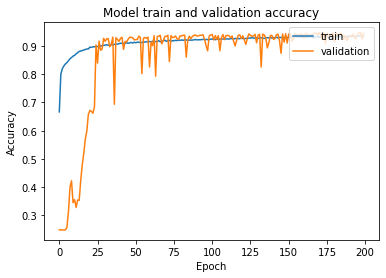

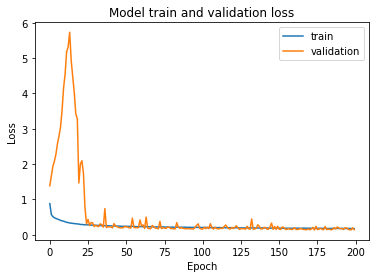

In [42]:
scf_4 = cnn_model(4)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_4, y_labels)

# training 
history = scf_4.fit(X_train, Y_train, epochs=200, batch_size=1024,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_4.save("/gdrive/My Drive/Trained Models/scf/scf_4_allSNR.tf")

# evaluating on test dataset
score = scf_4.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

## 8 x 16 SCF

Epoch 1/200
36/36 [==============================] - 10s 211ms/step - loss: 0.9818 - accuracy: 0.6146 - val_loss: 1.7063 - val_accuracy: 0.2471
Epoch 2/200
36/36 [==============================] - 6s 180ms/step - loss: 0.5440 - accuracy: 0.8127 - val_loss: 2.1681 - val_accuracy: 0.2471
Epoch 3/200
36/36 [==============================] - 7s 181ms/step - loss: 0.4788 - accuracy: 0.8306 - val_loss: 2.0361 - val_accuracy: 0.4609
Epoch 4/200
36/36 [==============================] - 7s 183ms/step - loss: 0.4541 - accuracy: 0.8425 - val_loss: 1.8749 - val_accuracy: 0.4646
Epoch 5/200
36/36 [==============================] - 7s 184ms/step - loss: 0.4433 - accuracy: 0.8459 - val_loss: 1.8186 - val_accuracy: 0.4683
Epoch 6/200
36/36 [==============================] - 7s 183ms/step - loss: 0.4248 - accuracy: 0.8502 - val_loss: 1.6827 - val_accuracy: 0.4420
Epoch 7/200
36/36 [==============================] - 7s 182ms/step - loss: 0.4261 - accuracy: 0.8492 - val_loss: 1.6564 - val_accuracy: 0.322

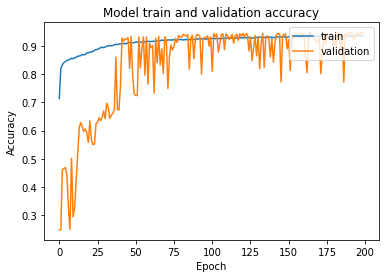

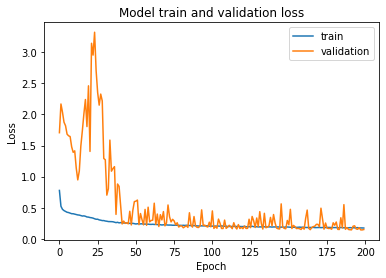

In [81]:
scf_8 = cnn_model(8)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_8, y_labels)

# training 
history = scf_8.fit(X_train, Y_train, epochs=200, batch_size=1024,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_8.save("/gdrive/My Drive/Trained Models/scf/scf_8_allSNR.tf")

# evaluating on test dataset
score = scf_8.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

## 16 x 16 SCF


Epoch 1/200
36/36 [==============================] - 14s 355ms/step - loss: 0.8551 - accuracy: 0.6786 - val_loss: 2.1221 - val_accuracy: 0.3038
Epoch 2/200
36/36 [==============================] - 11s 320ms/step - loss: 0.4507 - accuracy: 0.8482 - val_loss: 2.3742 - val_accuracy: 0.2525
Epoch 3/200
36/36 [==============================] - 12s 322ms/step - loss: 0.4024 - accuracy: 0.8635 - val_loss: 2.1864 - val_accuracy: 0.2525
Epoch 4/200
36/36 [==============================] - 12s 324ms/step - loss: 0.3851 - accuracy: 0.8658 - val_loss: 2.2679 - val_accuracy: 0.2525
Epoch 5/200
36/36 [==============================] - 12s 326ms/step - loss: 0.3741 - accuracy: 0.8704 - val_loss: 2.1325 - val_accuracy: 0.2568
Epoch 6/200
36/36 [==============================] - 12s 328ms/step - loss: 0.3720 - accuracy: 0.8684 - val_loss: 2.3291 - val_accuracy: 0.2543
Epoch 7/200
36/36 [==============================] - 12s 329ms/step - loss: 0.3535 - accuracy: 0.8751 - val_loss: 1.8950 - val_accuracy:

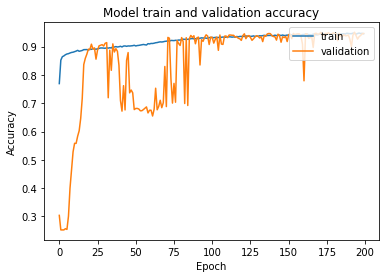

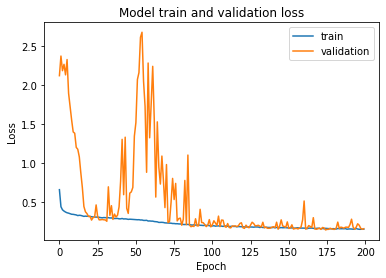

In [45]:
scf_16 = cnn_model(16)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_16, y_labels)

# training 
history = scf_16.fit(X_train, Y_train, epochs=200, batch_size=1024,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_16.save("/gdrive/My Drive/Trained Models/scf/scf_16_allSNR.tf")

# evaluating on test dataset
score = scf_16.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

## 32 x 16 SCF 

Epoch 1/200
36/36 [==============================] - 30s 741ms/step - loss: 0.7837 - accuracy: 0.7085 - val_loss: 2.3649 - val_accuracy: 0.2452
Epoch 2/200
36/36 [==============================] - 24s 670ms/step - loss: 0.4044 - accuracy: 0.8675 - val_loss: 3.2779 - val_accuracy: 0.2452
Epoch 3/200
36/36 [==============================] - 24s 665ms/step - loss: 0.3634 - accuracy: 0.8774 - val_loss: 3.9390 - val_accuracy: 0.2452
Epoch 4/200
36/36 [==============================] - 24s 667ms/step - loss: 0.3499 - accuracy: 0.8800 - val_loss: 4.2482 - val_accuracy: 0.2452
Epoch 5/200
36/36 [==============================] - 24s 668ms/step - loss: 0.3371 - accuracy: 0.8831 - val_loss: 4.7184 - val_accuracy: 0.2452
Epoch 6/200
36/36 [==============================] - 24s 668ms/step - loss: 0.3345 - accuracy: 0.8835 - val_loss: 4.1889 - val_accuracy: 0.2452
Epoch 7/200
36/36 [==============================] - 24s 667ms/step - loss: 0.3226 - accuracy: 0.8863 - val_loss: 3.5136 - val_accuracy:

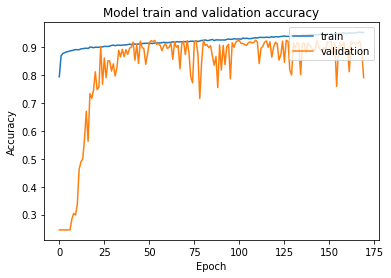

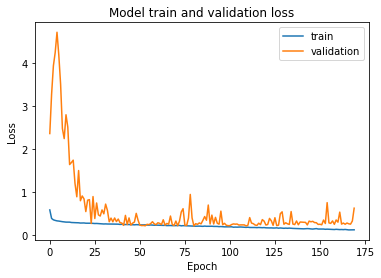

In [43]:
scf_32 = cnn_model(32)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_32, y_labels)

# training 
history = scf_32.fit(X_train, Y_train, epochs=200, batch_size=1024,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_32.save("/gdrive/My Drive/Trained Models/scf/scf_32_allSNR.tf")

# evaluating on test dataset
score = scf_32.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

## 64 x 16 SCF

Epoch 1/200
71/71 [==============================] - 55s 711ms/step - loss: 0.6426 - accuracy: 0.7703 - val_loss: 4.1880 - val_accuracy: 0.2471
Epoch 2/200
71/71 [==============================] - 49s 689ms/step - loss: 0.3284 - accuracy: 0.8905 - val_loss: 7.2174 - val_accuracy: 0.2471
Epoch 3/200
71/71 [==============================] - 49s 694ms/step - loss: 0.3078 - accuracy: 0.8949 - val_loss: 6.7958 - val_accuracy: 0.2471
Epoch 4/200
71/71 [==============================] - 49s 692ms/step - loss: 0.2937 - accuracy: 0.8998 - val_loss: 6.8765 - val_accuracy: 0.2471
Epoch 5/200
71/71 [==============================] - 49s 695ms/step - loss: 0.2785 - accuracy: 0.9030 - val_loss: 5.8892 - val_accuracy: 0.2471
Epoch 6/200
71/71 [==============================] - 49s 693ms/step - loss: 0.2728 - accuracy: 0.9031 - val_loss: 5.0491 - val_accuracy: 0.2580
Epoch 7/200
71/71 [==============================] - 49s 693ms/step - loss: 0.2585 - accuracy: 0.9103 - val_loss: 3.0457 - val_accuracy:

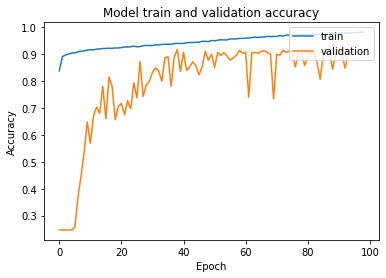

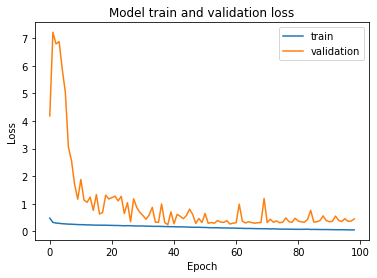

In [82]:
scf_64 = cnn_model(64)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_64, y_labels)

# training 
history = scf_64.fit(X_train, Y_train, epochs=200, batch_size=512,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_64.save("/gdrive/My Drive/Trained Models/scf/scf_64_allSNR.tf")

# evaluating on test dataset
score = scf_64.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

# Training and Analysis

## 16 x 16 SCF

### High SNR

In [ ]:
x_dim = x_data_16_data[:,7:15].shape
total_num_snapshots = x_dim[0]*x_dim[1]*x_dim[2]
num_tech = x_dim[0]

x_data_16_high = np.reshape(x_data_16_data[:,7:15], (total_num_snapshots, 16, 16, 1))
y_labels_high = to_categorical(y_labels_data[:,7:15].flatten())

Epoch 1/200
19/19 [==============================] - 9s 377ms/step - loss: 0.6686 - accuracy: 0.7423 - val_loss: 2.0535 - val_accuracy: 0.2586
Epoch 2/200
19/19 [==============================] - 7s 355ms/step - loss: 0.1900 - accuracy: 0.9473 - val_loss: 1.9002 - val_accuracy: 0.2564
Epoch 3/200
19/19 [==============================] - 7s 356ms/step - loss: 0.1428 - accuracy: 0.9583 - val_loss: 1.7941 - val_accuracy: 0.2564
Epoch 4/200
19/19 [==============================] - 7s 358ms/step - loss: 0.1217 - accuracy: 0.9624 - val_loss: 1.8117 - val_accuracy: 0.2564
Epoch 5/200
19/19 [==============================] - 7s 359ms/step - loss: 0.1072 - accuracy: 0.9651 - val_loss: 1.7736 - val_accuracy: 0.2564
Epoch 6/200
19/19 [==============================] - 7s 360ms/step - loss: 0.1023 - accuracy: 0.9671 - val_loss: 1.8454 - val_accuracy: 0.2564
Epoch 7/200
19/19 [==============================] - 7s 361ms/step - loss: 0.0964 - accuracy: 0.9680 - val_loss: 1.7730 - val_accuracy: 0.2598

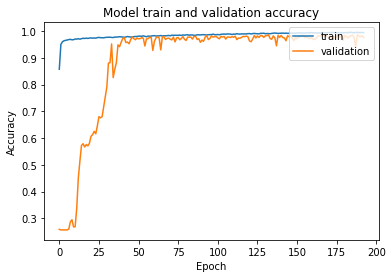

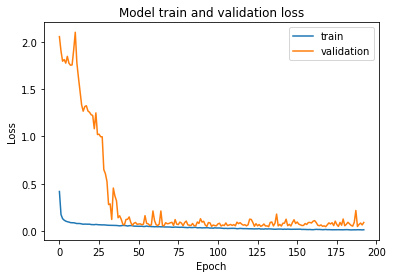

In [ ]:
scf_16 = cnn_model(16)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_16_high, y_labels_high)

# training 
history = scf_16.fit(X_train, Y_train, epochs=200, batch_size=1024,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_16.save("/gdrive/My Drive/Trained Models/scf/scf_16_highSNR.tf")

# evaluating on test dataset
score = scf_16.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

### Low SNR

In [ ]:
x_dim = x_data_16_data[:,0:7].shape
total_num_snapshots = x_dim[0]*x_dim[1]*x_dim[2]
num_tech = x_dim[0]

x_data_16_low = np.reshape(x_data_16_data[:,0:7], (total_num_snapshots, 16, 16, 1))
y_labels_low = to_categorical(y_labels_data[:,0:7].flatten())

Epoch 1/200
17/17 [==============================] - 9s 470ms/step - loss: 1.2343 - accuracy: 0.4944 - val_loss: 1.9033 - val_accuracy: 0.2488
Epoch 2/200
17/17 [==============================] - 6s 367ms/step - loss: 0.7443 - accuracy: 0.7201 - val_loss: 2.3289 - val_accuracy: 0.3870
Epoch 3/200
17/17 [==============================] - 6s 371ms/step - loss: 0.6469 - accuracy: 0.7578 - val_loss: 2.5149 - val_accuracy: 0.3161
Epoch 4/200
17/17 [==============================] - 6s 372ms/step - loss: 0.6266 - accuracy: 0.7687 - val_loss: 2.4261 - val_accuracy: 0.2716
Epoch 5/200
17/17 [==============================] - 6s 374ms/step - loss: 0.5978 - accuracy: 0.7775 - val_loss: 2.1811 - val_accuracy: 0.3546
Epoch 6/200
17/17 [==============================] - 6s 375ms/step - loss: 0.5899 - accuracy: 0.7832 - val_loss: 2.0747 - val_accuracy: 0.3614
Epoch 7/200
17/17 [==============================] - 6s 375ms/step - loss: 0.5814 - accuracy: 0.7809 - val_loss: 1.9891 - val_accuracy: 0.4870

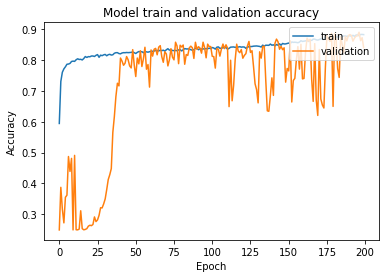

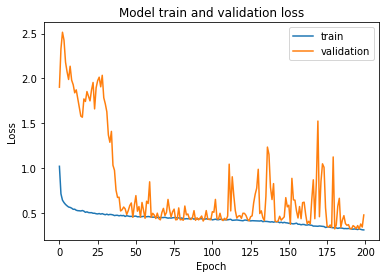

In [ ]:
scf_16 = cnn_model(16)

# obtain training data
X_train, Y_train, X_validation, Y_validation, X_test,  Y_test = train_valid_test(x_data_16_low, y_labels_low)

# training 
history = scf_16.fit(X_train, Y_train, epochs=200, batch_size=1024,  validation_data = (X_validation, Y_validation), shuffle=True, callbacks=[ES])
scf_16.save("/gdrive/My Drive/Trained Models/scf/scf_16_lowSNR.tf")

# evaluating on test dataset
score = scf_16.evaluate(X_test, Y_test, verbose=0)
print('\nTest Score = ' + str(score[1]*100) + '\n')

summarize_model(history)

# Transfer learning

## Helper functions

In [13]:
from matplotlib import pyplot
from keras import models

def summarize_model(history, i):

  pyplot.plot(history.history['accuracy'])
  pyplot.plot(history.history['val_accuracy']) 
  pyplot.title('Model train and validation accuracy - SNR ' + str(2*i-20))
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()

  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])  
  pyplot.title('Model train and validation loss - SNR ' + str(2*i-20))
  pyplot.ylabel('Loss')
  pyplot.xlabel('Epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()

In [14]:
score_arr = [0, 0]

def train_data(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, num_samples, i):
  
  print("\nTraining SNR = "+str(2*i-20)+" Data\n")
  model_curr = cnn_model(num_samples)
  history = model_curr.fit(X_train_curr, Y_train_curr, validation_data = (X_validation_curr, Y_validation_curr), epochs=200, batch_size=1024)

  score = model_curr.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('\nEvaluating on Test data : Score of SNR ' + str(2*i-20) + ' = ' + str(score[1]*100) +'\n')
  score_ = score[1]*100
  summarize_model(history, i)

  del history, model_curr
  return score_

def train_data_on_all_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder, i):
  
  all_snr_model = models.load_model(model_folder)
  score = all_snr_model.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('\nScore of SNR on All SNR model without Transfer Learning ' + str(2*i-20) + ' = ' + str(score[1]*100))
  score_arr[0] = score[1]*100

  print("\nTraining SNR = "+str(2*i-20)+" Data on a pre-trained All SNR model\n")
  history = all_snr_model.fit(X_train_curr, Y_train_curr, validation_data = (X_validation_curr, Y_validation_curr), epochs=200, batch_size=1024, callbacks=[ES])

  score = all_snr_model.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('\nEvaluating on Test data : Score of SNR ' + str(2*i-20) + ' = ' + str(score[1]*100) +'\n')
  score_arr[1] = score[1]*100
  summarize_model(history, i)

  del history, all_snr_model
  return score_arr

def train_data_on_high_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder, i):
  
  high_snr_model = models.load_model(model_folder)
  score = high_snr_model.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('Score of SNR on High SNR model without Transfer Learning ' + str(2*i-20) + ' = ' + str(score[1]*100))
  score_arr[0] = score[1]*100

  print("\nTraining SNR = "+str(2*i-20)+" Data on a pre-trained High SNR model\n")
  history = high_snr_model.fit(X_train_curr, Y_train_curr, validation_data = (X_validation_curr, Y_validation_curr), epochs=200, batch_size=1024, callbacks=[ES])

  score = high_snr_model.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('\nEvaluating on Test data : Score of SNR ' + str(2*i-20) + ' = ' + str(score[1]*100) +'\n')
  score_arr[1] = score[1]*100
  summarize_model(history, i)

  del history, high_snr_model
  return score_arr

def train_data_on_low_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder, i):
  
  low_snr_model = models.load_model(model_folder)
  score = low_snr_model.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('Score of SNR on low SNR model without Transfer Learning ' + str(2*i-20) + ' = ' + str(score[1]*100))
  score_arr[0] = score[1]*100

  print("\nTraining SNR = "+str(2*i-20)+" Data on a pre-trained Low SNR model\n")
  history = low_snr_model.fit(X_train_curr, Y_train_curr, validation_data = (X_validation_curr, Y_validation_curr), epochs=200, batch_size=1024, callbacks=[ES])

  score = low_snr_model.evaluate(X_test_curr, Y_test_curr, verbose=0)
  print('\nEvaluating on Test data : Score of SNR ' + str(2*i-20) + ' = ' + str(score[1]*100) +'\n')
  score_arr[1] = score[1]*100
  summarize_model(history, i)

  del history, low_snr_model
  return score_arr

In [15]:
  x_dim = x_data_16_data[:,0].shape
  total_num_snapshots = x_dim[0]*x_dim[1]*x_dim[2]
  num_tech = x_dim[0]

## 16 x 16 SCF

In [11]:
scores_without_tf_16 = np.zeros(shape=(10,1))
scores_tf_allsnr_16 = np.zeros(shape=(2,10))
scores_tf_highsnr_16 = np.zeros(shape=(2,10))
scores_tf_lowsnr_16 = np.zeros(shape=(2,10))

In [12]:
model_folder_all = "/gdrive/My Drive/Trained Models/scf/scf_16_allSNR.tf"
model_folder_high = "/gdrive/My Drive/Trained Models/scf/scf_16_highSNR.tf"
model_folder_low = "/gdrive/My Drive/Trained Models/scf/scf_16_lowSNR.tf"


Training SNR = -20 Data

Epoch 1/200
3/3 [==============================] - 3s 491ms/step - loss: 1.6465 - accuracy: 0.2749 - val_loss: 1.3876 - val_accuracy: 0.2450
Epoch 2/200
3/3 [==============================] - 1s 248ms/step - loss: 1.6165 - accuracy: 0.2856 - val_loss: 1.3815 - val_accuracy: 0.5600
Epoch 3/200
3/3 [==============================] - 1s 250ms/step - loss: 1.5872 - accuracy: 0.2851 - val_loss: 1.3816 - val_accuracy: 0.3113
Epoch 4/200
3/3 [==============================] - 1s 252ms/step - loss: 1.5538 - accuracy: 0.2779 - val_loss: 1.3844 - val_accuracy: 0.2713
Epoch 5/200
3/3 [==============================] - 1s 252ms/step - loss: 1.5212 - accuracy: 0.2815 - val_loss: 1.3902 - val_accuracy: 0.2700
Epoch 6/200
3/3 [==============================] - 1s 251ms/step - loss: 1.4772 - accuracy: 0.2936 - val_loss: 1.3980 - val_accuracy: 0.2700
Epoch 7/200
3/3 [==============================] - 1s 252ms/step - loss: 1.4699 - accuracy: 0.2972 - val_loss: 1.4069 - val_accu

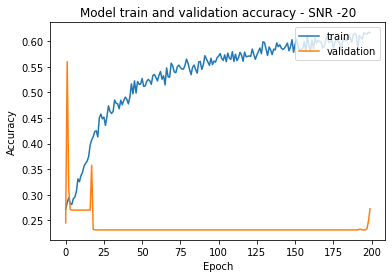

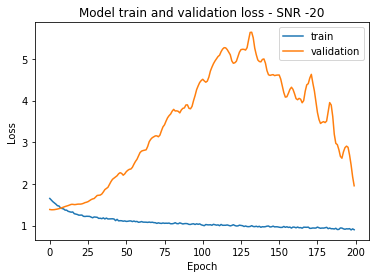


Score of SNR on All SNR model without Transfer Learning -20 = 68.37499737739563

Training SNR = -20 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 496ms/step - loss: 1.3983 - accuracy: 0.6567 - val_loss: 3.0008 - val_accuracy: 0.4487
Epoch 2/200
3/3 [==============================] - 1s 273ms/step - loss: 1.1120 - accuracy: 0.6621 - val_loss: 2.3417 - val_accuracy: 0.5025
Epoch 3/200
3/3 [==============================] - 1s 265ms/step - loss: 1.0322 - accuracy: 0.6829 - val_loss: 1.2931 - val_accuracy: 0.5962
Epoch 4/200
3/3 [==============================] - 1s 267ms/step - loss: 0.9667 - accuracy: 0.6829 - val_loss: 0.9474 - val_accuracy: 0.6363
Epoch 5/200
3/3 [==============================] - 1s 266ms/step - loss: 0.9907 - accuracy: 0.6862 - val_loss: 0.8997 - val_accuracy: 0.6413
Epoch 6/200
3/3 [==============================] - 1s 266ms/step - loss: 0.9266 - accuracy: 0.6892 - val_loss: 1.0646 - val_accuracy: 0.6112
Epoch 7/200
3/3 

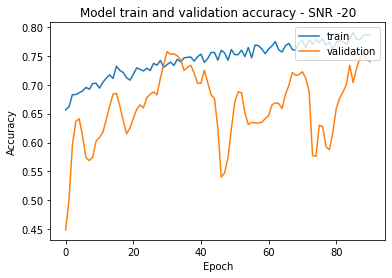

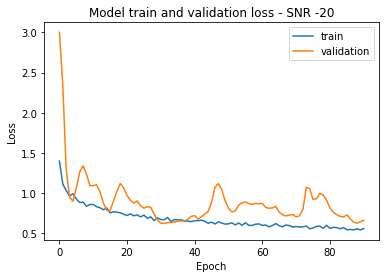

Score of SNR on High SNR model without Transfer Learning -20 = 25.24999976158142

Training SNR = -20 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 494ms/step - loss: 5.2589 - accuracy: 0.4542 - val_loss: 14.4211 - val_accuracy: 0.2500
Epoch 2/200
3/3 [==============================] - 1s 270ms/step - loss: 4.5101 - accuracy: 0.4533 - val_loss: 16.6138 - val_accuracy: 0.2463
Epoch 3/200
3/3 [==============================] - 1s 265ms/step - loss: 3.9287 - accuracy: 0.4663 - val_loss: 17.8052 - val_accuracy: 0.2450
Epoch 4/200
3/3 [==============================] - 1s 266ms/step - loss: 3.6318 - accuracy: 0.4483 - val_loss: 18.1615 - val_accuracy: 0.2450
Epoch 5/200
3/3 [==============================] - 1s 266ms/step - loss: 3.3471 - accuracy: 0.4804 - val_loss: 17.2526 - val_accuracy: 0.2450
Epoch 6/200
3/3 [==============================] - 1s 268ms/step - loss: 3.3055 - accuracy: 0.4479 - val_loss: 15.7226 - val_accuracy: 0.2450
Epoch 7/2

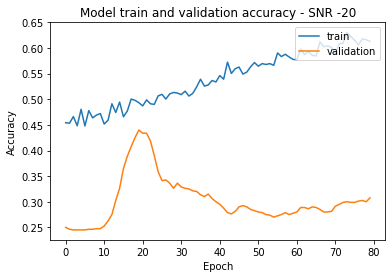

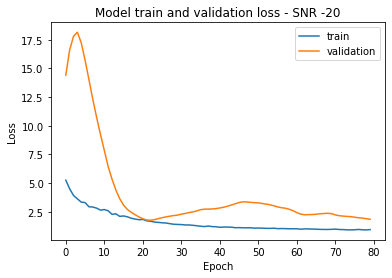

Score of SNR on low SNR model without Transfer Learning -20 = 53.87499928474426

Training SNR = -20 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 494ms/step - loss: 1.1728 - accuracy: 0.6367 - val_loss: 2.3687 - val_accuracy: 0.4288
Epoch 2/200
3/3 [==============================] - 1s 265ms/step - loss: 1.0555 - accuracy: 0.6413 - val_loss: 1.9885 - val_accuracy: 0.4588
Epoch 3/200
3/3 [==============================] - 1s 263ms/step - loss: 0.9926 - accuracy: 0.6621 - val_loss: 2.1445 - val_accuracy: 0.4225
Epoch 4/200
3/3 [==============================] - 1s 264ms/step - loss: 0.9723 - accuracy: 0.6575 - val_loss: 2.8545 - val_accuracy: 0.3650
Epoch 5/200
3/3 [==============================] - 1s 267ms/step - loss: 0.9564 - accuracy: 0.6550 - val_loss: 3.7697 - val_accuracy: 0.3050
Epoch 6/200
3/3 [==============================] - 1s 265ms/step - loss: 0.9275 - accuracy: 0.6608 - val_loss: 3.9762 - val_accuracy: 0.2975
Epoch 7/200
3/3 [

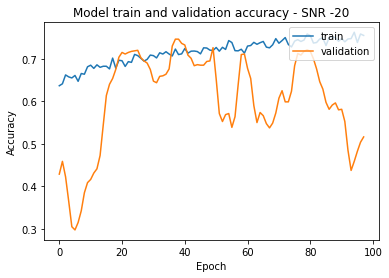

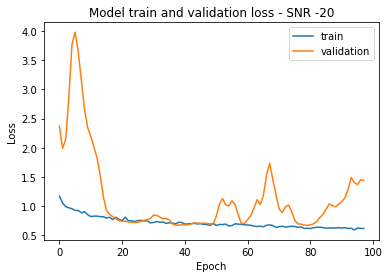

[[31.37499988]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[68.37499738  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [73.25000167  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]] [[25.24999976  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [33.50000083  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]] [[53.87499928  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [53.37499976  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]

Training SNR = -18 Data

Epoch 1/200
3/3 [==============================] - 3s 529ms/step - loss: 1.6118 - accuracy: 0.2693 - val_loss: 1.3826 

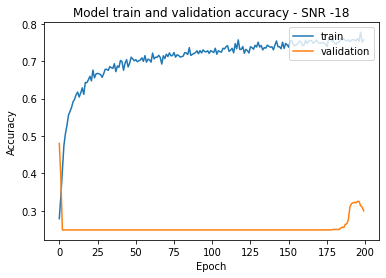

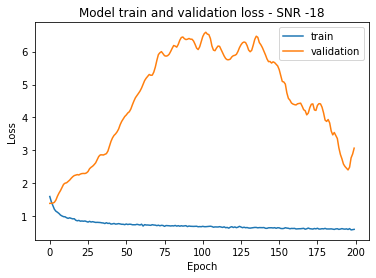


Score of SNR on All SNR model without Transfer Learning -18 = 87.62500286102295

Training SNR = -18 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 490ms/step - loss: 0.7034 - accuracy: 0.7867 - val_loss: 1.2523 - val_accuracy: 0.6787
Epoch 2/200
3/3 [==============================] - 1s 262ms/step - loss: 0.5811 - accuracy: 0.8025 - val_loss: 1.7473 - val_accuracy: 0.6488
Epoch 3/200
3/3 [==============================] - 1s 265ms/step - loss: 0.5413 - accuracy: 0.8163 - val_loss: 1.5077 - val_accuracy: 0.6550
Epoch 4/200
3/3 [==============================] - 1s 266ms/step - loss: 0.5030 - accuracy: 0.8138 - val_loss: 1.0976 - val_accuracy: 0.6900
Epoch 5/200
3/3 [==============================] - 1s 262ms/step - loss: 0.5164 - accuracy: 0.8100 - val_loss: 0.7501 - val_accuracy: 0.7450
Epoch 6/200
3/3 [==============================] - 1s 264ms/step - loss: 0.5008 - accuracy: 0.8129 - val_loss: 0.5505 - val_accuracy: 0.7850
Epoch 7/200
3/3 

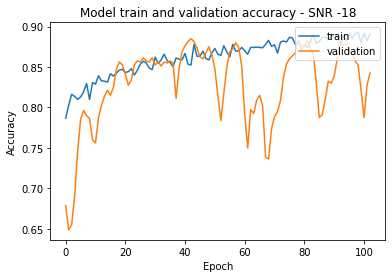

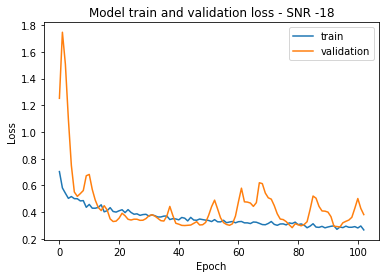

Score of SNR on High SNR model without Transfer Learning -18 = 40.12500047683716

Training SNR = -18 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 488ms/step - loss: 3.2321 - accuracy: 0.5933 - val_loss: 10.1329 - val_accuracy: 0.3325
Epoch 2/200
3/3 [==============================] - 1s 256ms/step - loss: 2.6204 - accuracy: 0.6167 - val_loss: 10.9143 - val_accuracy: 0.3050
Epoch 3/200
3/3 [==============================] - 1s 261ms/step - loss: 2.3220 - accuracy: 0.6229 - val_loss: 10.5692 - val_accuracy: 0.3025
Epoch 4/200
3/3 [==============================] - 1s 255ms/step - loss: 2.0627 - accuracy: 0.6392 - val_loss: 9.1001 - val_accuracy: 0.3075
Epoch 5/200
3/3 [==============================] - 1s 256ms/step - loss: 2.0896 - accuracy: 0.6329 - val_loss: 7.2778 - val_accuracy: 0.3300
Epoch 6/200
3/3 [==============================] - 1s 259ms/step - loss: 1.9135 - accuracy: 0.6392 - val_loss: 6.0374 - val_accuracy: 0.3650
Epoch 7/200


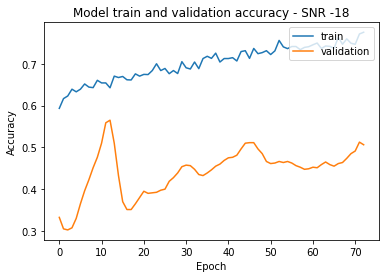

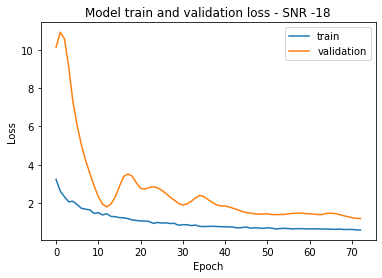

Score of SNR on low SNR model without Transfer Learning -18 = 75.24999976158142

Training SNR = -18 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 532ms/step - loss: 0.5544 - accuracy: 0.7962 - val_loss: 0.7039 - val_accuracy: 0.7262
Epoch 2/200
3/3 [==============================] - 1s 260ms/step - loss: 0.5381 - accuracy: 0.8021 - val_loss: 0.5847 - val_accuracy: 0.7788
Epoch 3/200
3/3 [==============================] - 1s 262ms/step - loss: 0.5077 - accuracy: 0.8112 - val_loss: 0.6123 - val_accuracy: 0.7850
Epoch 4/200
3/3 [==============================] - 1s 260ms/step - loss: 0.5372 - accuracy: 0.8058 - val_loss: 0.6464 - val_accuracy: 0.7688
Epoch 5/200
3/3 [==============================] - 1s 258ms/step - loss: 0.4955 - accuracy: 0.8071 - val_loss: 0.6764 - val_accuracy: 0.7500
Epoch 6/200
3/3 [==============================] - 1s 259ms/step - loss: 0.4780 - accuracy: 0.8083 - val_loss: 0.7226 - val_accuracy: 0.7262
Epoch 7/200
3/3 [

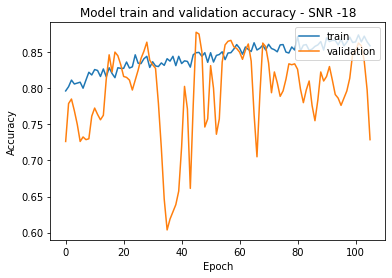

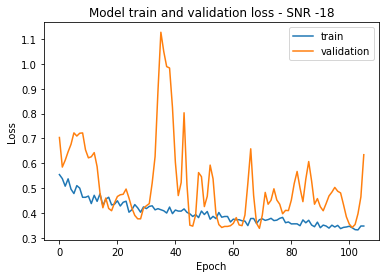

[[31.37499988]
 [26.24999881]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[68.37499738 87.62500286  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [73.25000167 82.24999905  0.          0.          0.          0.
   0.          0.          0.          0.        ]] [[25.24999976 40.12500048  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [33.50000083 49.75000024  0.          0.          0.          0.
   0.          0.          0.          0.        ]] [[53.87499928 75.24999976  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [53.37499976 78.87499928  0.          0.          0.          0.
   0.          0.          0.          0.        ]]

Training SNR = -16 Data

Epoch 1/200
3/3 [==============================] - 3s 488ms/step - loss: 1.6145 - accuracy: 0.2944 - val_loss: 1.3957 

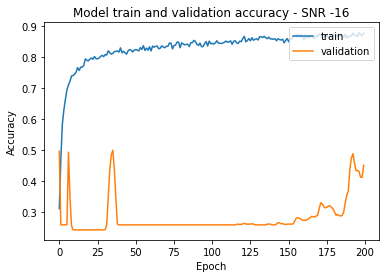

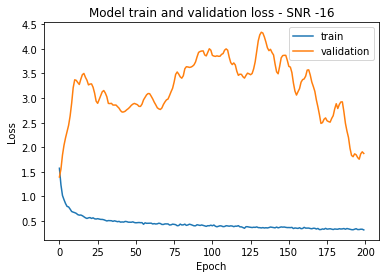


Score of SNR on All SNR model without Transfer Learning -16 = 90.37500023841858

Training SNR = -16 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 496ms/step - loss: 0.3476 - accuracy: 0.8813 - val_loss: 0.3612 - val_accuracy: 0.8750
Epoch 2/200
3/3 [==============================] - 1s 271ms/step - loss: 0.2823 - accuracy: 0.9038 - val_loss: 0.4670 - val_accuracy: 0.8425
Epoch 3/200
3/3 [==============================] - 1s 268ms/step - loss: 0.2773 - accuracy: 0.9004 - val_loss: 0.4832 - val_accuracy: 0.8450
Epoch 4/200
3/3 [==============================] - 1s 270ms/step - loss: 0.2600 - accuracy: 0.8975 - val_loss: 0.4702 - val_accuracy: 0.8500
Epoch 5/200
3/3 [==============================] - 1s 267ms/step - loss: 0.2621 - accuracy: 0.8988 - val_loss: 0.4148 - val_accuracy: 0.8625
Epoch 6/200
3/3 [==============================] - 1s 273ms/step - loss: 0.2499 - accuracy: 0.9112 - val_loss: 0.3523 - val_accuracy: 0.8825
Epoch 7/200
3/3 

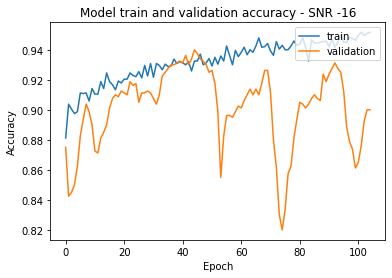

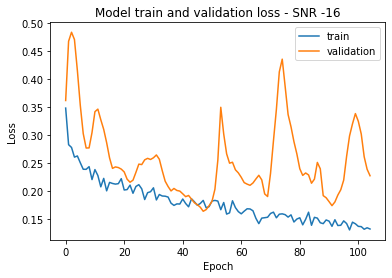

Score of SNR on High SNR model without Transfer Learning -16 = 59.375

Training SNR = -16 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 486ms/step - loss: 1.7022 - accuracy: 0.7358 - val_loss: 2.9441 - val_accuracy: 0.6087
Epoch 2/200
3/3 [==============================] - 1s 257ms/step - loss: 1.3324 - accuracy: 0.7663 - val_loss: 1.8153 - val_accuracy: 0.6687
Epoch 3/200
3/3 [==============================] - 1s 257ms/step - loss: 1.2711 - accuracy: 0.7683 - val_loss: 1.2252 - val_accuracy: 0.7287
Epoch 4/200
3/3 [==============================] - 1s 257ms/step - loss: 1.1789 - accuracy: 0.7796 - val_loss: 1.3265 - val_accuracy: 0.7063
Epoch 5/200
3/3 [==============================] - 1s 260ms/step - loss: 1.0691 - accuracy: 0.7804 - val_loss: 1.5012 - val_accuracy: 0.6513
Epoch 6/200
3/3 [==============================] - 1s 259ms/step - loss: 1.0490 - accuracy: 0.7871 - val_loss: 1.7349 - val_accuracy: 0.5913
Epoch 7/200
3/3 [=========

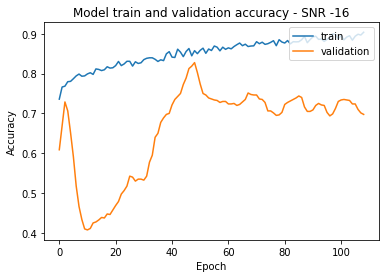

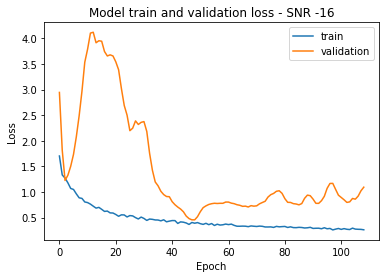

Score of SNR on low SNR model without Transfer Learning -16 = 89.24999833106995

Training SNR = -16 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 494ms/step - loss: 0.2744 - accuracy: 0.8988 - val_loss: 0.5935 - val_accuracy: 0.8000
Epoch 2/200
3/3 [==============================] - 1s 257ms/step - loss: 0.2550 - accuracy: 0.9071 - val_loss: 0.5856 - val_accuracy: 0.7912
Epoch 3/200
3/3 [==============================] - 1s 263ms/step - loss: 0.2709 - accuracy: 0.8954 - val_loss: 0.5001 - val_accuracy: 0.8188
Epoch 4/200
3/3 [==============================] - 1s 261ms/step - loss: 0.2558 - accuracy: 0.9071 - val_loss: 0.5557 - val_accuracy: 0.8012
Epoch 5/200
3/3 [==============================] - 1s 255ms/step - loss: 0.2645 - accuracy: 0.9008 - val_loss: 0.6066 - val_accuracy: 0.7875
Epoch 6/200
3/3 [==============================] - 1s 258ms/step - loss: 0.2467 - accuracy: 0.9121 - val_loss: 0.6119 - val_accuracy: 0.7962
Epoch 7/200
3/3 [

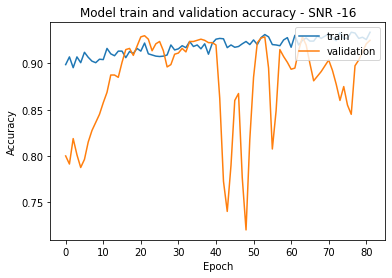

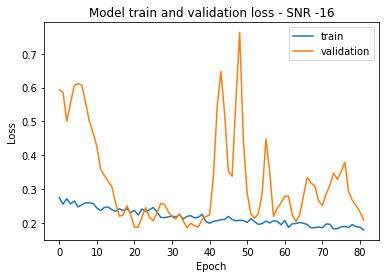

[[31.37499988]
 [26.24999881]
 [44.49999928]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[68.37499738 87.62500286 90.37500024  0.          0.          0.
   0.          0.          0.          0.        ]
 [73.25000167 82.24999905 91.87499881  0.          0.          0.
   0.          0.          0.          0.        ]] [[25.24999976 40.12500048 59.375       0.          0.          0.
   0.          0.          0.          0.        ]
 [33.50000083 49.75000024 70.24999857  0.          0.          0.
   0.          0.          0.          0.        ]] [[53.87499928 75.24999976 89.24999833  0.          0.          0.
   0.          0.          0.          0.        ]
 [53.37499976 78.87499928 93.37499738  0.          0.          0.
   0.          0.          0.          0.        ]]

Training SNR = -14 Data

Epoch 1/200
3/3 [==============================] - 3s 491ms/step - loss: 1.6102 - accuracy: 0.3411 - val_loss: 1.4034 

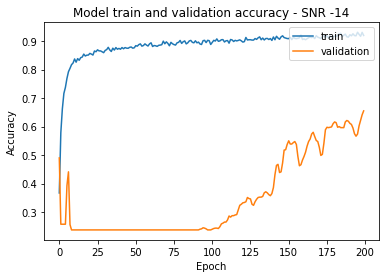

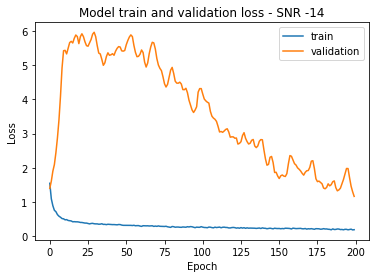


Score of SNR on All SNR model without Transfer Learning -14 = 92.00000166893005

Training SNR = -14 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 514ms/step - loss: 0.1731 - accuracy: 0.9375 - val_loss: 0.2076 - val_accuracy: 0.9075
Epoch 2/200
3/3 [==============================] - 1s 309ms/step - loss: 0.1517 - accuracy: 0.9454 - val_loss: 0.2094 - val_accuracy: 0.9062
Epoch 3/200
3/3 [==============================] - 1s 269ms/step - loss: 0.1578 - accuracy: 0.9417 - val_loss: 0.1821 - val_accuracy: 0.9237
Epoch 4/200
3/3 [==============================] - 1s 272ms/step - loss: 0.1547 - accuracy: 0.9379 - val_loss: 0.1484 - val_accuracy: 0.9388
Epoch 5/200
3/3 [==============================] - 1s 268ms/step - loss: 0.1462 - accuracy: 0.9471 - val_loss: 0.1278 - val_accuracy: 0.9463
Epoch 6/200
3/3 [==============================] - 1s 269ms/step - loss: 0.1479 - accuracy: 0.9442 - val_loss: 0.1182 - val_accuracy: 0.9575
Epoch 7/200
3/3 

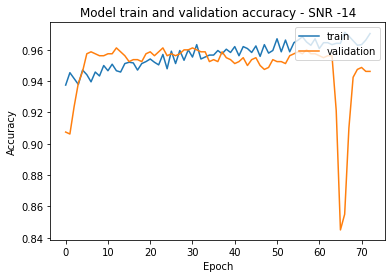

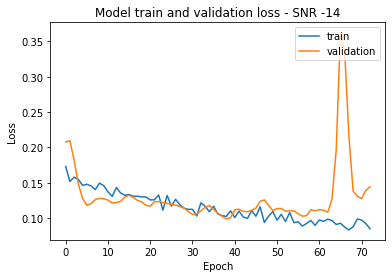

Score of SNR on High SNR model without Transfer Learning -14 = 72.75000214576721

Training SNR = -14 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 491ms/step - loss: 0.9754 - accuracy: 0.8279 - val_loss: 1.6693 - val_accuracy: 0.7613
Epoch 2/200
3/3 [==============================] - 1s 260ms/step - loss: 0.7588 - accuracy: 0.8475 - val_loss: 0.8304 - val_accuracy: 0.8188
Epoch 3/200
3/3 [==============================] - 1s 262ms/step - loss: 0.6767 - accuracy: 0.8608 - val_loss: 0.5788 - val_accuracy: 0.8462
Epoch 4/200
3/3 [==============================] - 1s 264ms/step - loss: 0.5633 - accuracy: 0.8679 - val_loss: 0.6846 - val_accuracy: 0.8050
Epoch 5/200
3/3 [==============================] - 1s 265ms/step - loss: 0.5749 - accuracy: 0.8696 - val_loss: 0.8903 - val_accuracy: 0.7400
Epoch 6/200
3/3 [==============================] - 1s 264ms/step - loss: 0.5422 - accuracy: 0.8579 - val_loss: 1.2506 - val_accuracy: 0.6612
Epoch 7/200
3/3

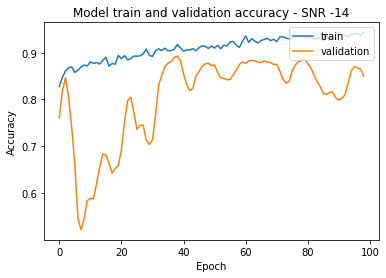

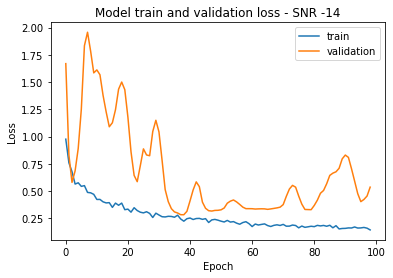

Score of SNR on low SNR model without Transfer Learning -14 = 92.62499809265137

Training SNR = -14 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 501ms/step - loss: 0.1851 - accuracy: 0.9287 - val_loss: 0.2050 - val_accuracy: 0.9275
Epoch 2/200
3/3 [==============================] - 1s 271ms/step - loss: 0.1789 - accuracy: 0.9329 - val_loss: 0.1989 - val_accuracy: 0.9275
Epoch 3/200
3/3 [==============================] - 1s 272ms/step - loss: 0.1754 - accuracy: 0.9325 - val_loss: 0.2286 - val_accuracy: 0.9137
Epoch 4/200
3/3 [==============================] - 1s 270ms/step - loss: 0.1677 - accuracy: 0.9375 - val_loss: 0.2510 - val_accuracy: 0.9112
Epoch 5/200
3/3 [==============================] - 1s 272ms/step - loss: 0.1811 - accuracy: 0.9413 - val_loss: 0.2592 - val_accuracy: 0.9100
Epoch 6/200
3/3 [==============================] - 1s 270ms/step - loss: 0.1701 - accuracy: 0.9408 - val_loss: 0.2789 - val_accuracy: 0.9038
Epoch 7/200
3/3 [

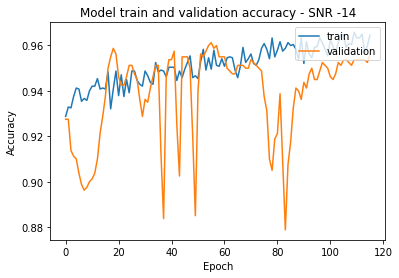

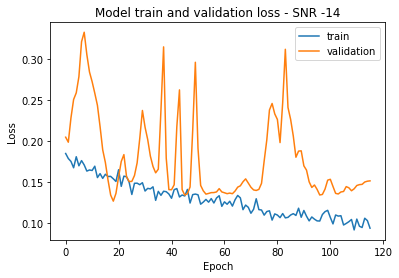

[[31.37499988]
 [26.24999881]
 [44.49999928]
 [66.12499952]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[68.37499738 87.62500286 90.37500024 92.00000167  0.          0.
   0.          0.          0.          0.        ]
 [73.25000167 82.24999905 91.87499881 94.24999952  0.          0.
   0.          0.          0.          0.        ]] [[25.24999976 40.12500048 59.375      72.75000215  0.          0.
   0.          0.          0.          0.        ]
 [33.50000083 49.75000024 70.24999857 83.87500048  0.          0.
   0.          0.          0.          0.        ]] [[53.87499928 75.24999976 89.24999833 92.62499809  0.          0.
   0.          0.          0.          0.        ]
 [53.37499976 78.87499928 93.37499738 93.87500286  0.          0.
   0.          0.          0.          0.        ]]

Training SNR = -12 Data

Epoch 1/200
3/3 [==============================] - 3s 489ms/step - loss: 1.5388 - accuracy: 0.3452 - val_loss: 1.3561 

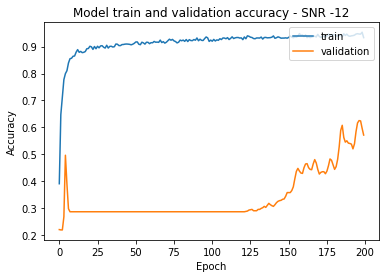

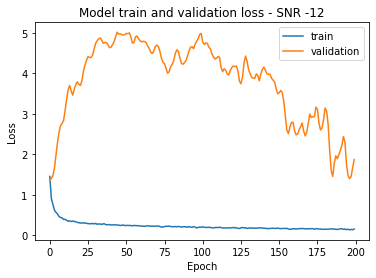


Score of SNR on All SNR model without Transfer Learning -12 = 94.24999952316284

Training SNR = -12 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 508ms/step - loss: 0.1615 - accuracy: 0.9429 - val_loss: 0.1280 - val_accuracy: 0.9538
Epoch 2/200
3/3 [==============================] - 1s 268ms/step - loss: 0.1426 - accuracy: 0.9446 - val_loss: 0.1264 - val_accuracy: 0.9538
Epoch 3/200
3/3 [==============================] - 1s 269ms/step - loss: 0.1221 - accuracy: 0.9558 - val_loss: 0.1375 - val_accuracy: 0.9463
Epoch 4/200
3/3 [==============================] - 1s 269ms/step - loss: 0.1177 - accuracy: 0.9563 - val_loss: 0.1458 - val_accuracy: 0.9425
Epoch 5/200
3/3 [==============================] - 1s 273ms/step - loss: 0.1219 - accuracy: 0.9538 - val_loss: 0.1501 - val_accuracy: 0.9388
Epoch 6/200
3/3 [==============================] - 1s 267ms/step - loss: 0.1112 - accuracy: 0.9554 - val_loss: 0.1353 - val_accuracy: 0.9525
Epoch 7/200
3/3 

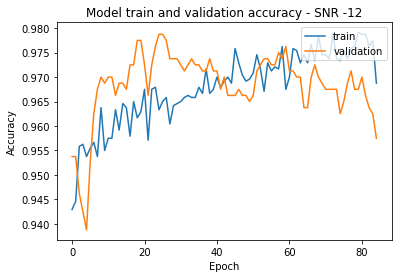

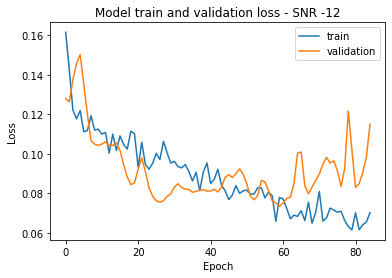

Score of SNR on High SNR model without Transfer Learning -12 = 79.87499833106995

Training SNR = -12 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 502ms/step - loss: 0.6327 - accuracy: 0.8792 - val_loss: 0.3797 - val_accuracy: 0.9062
Epoch 2/200
3/3 [==============================] - 1s 269ms/step - loss: 0.4821 - accuracy: 0.8904 - val_loss: 0.2640 - val_accuracy: 0.9312
Epoch 3/200
3/3 [==============================] - 1s 266ms/step - loss: 0.4679 - accuracy: 0.8958 - val_loss: 0.2494 - val_accuracy: 0.9325
Epoch 4/200
3/3 [==============================] - 1s 271ms/step - loss: 0.3914 - accuracy: 0.9046 - val_loss: 0.4254 - val_accuracy: 0.8737
Epoch 5/200
3/3 [==============================] - 1s 268ms/step - loss: 0.3712 - accuracy: 0.9079 - val_loss: 0.7301 - val_accuracy: 0.7788
Epoch 6/200
3/3 [==============================] - 1s 270ms/step - loss: 0.3087 - accuracy: 0.9071 - val_loss: 0.9961 - val_accuracy: 0.7362
Epoch 7/200
3/3

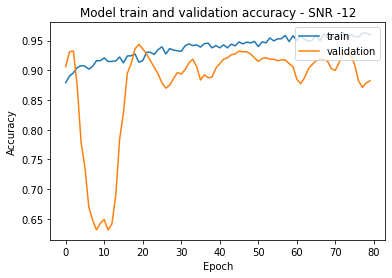

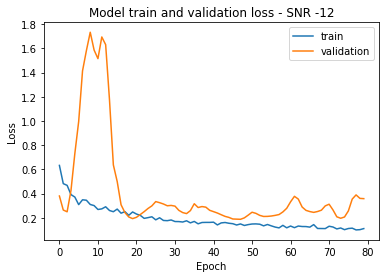

Score of SNR on low SNR model without Transfer Learning -12 = 94.74999904632568

Training SNR = -12 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 539ms/step - loss: 0.1539 - accuracy: 0.9454 - val_loss: 0.1696 - val_accuracy: 0.9438
Epoch 2/200
3/3 [==============================] - 1s 264ms/step - loss: 0.1536 - accuracy: 0.9454 - val_loss: 0.1387 - val_accuracy: 0.9525
Epoch 3/200
3/3 [==============================] - 1s 261ms/step - loss: 0.1510 - accuracy: 0.9463 - val_loss: 0.1432 - val_accuracy: 0.9538
Epoch 4/200
3/3 [==============================] - 1s 266ms/step - loss: 0.1411 - accuracy: 0.9521 - val_loss: 0.1530 - val_accuracy: 0.9513
Epoch 5/200
3/3 [==============================] - 1s 266ms/step - loss: 0.1474 - accuracy: 0.9488 - val_loss: 0.1858 - val_accuracy: 0.9425
Epoch 6/200
3/3 [==============================] - 1s 268ms/step - loss: 0.1468 - accuracy: 0.9463 - val_loss: 0.2145 - val_accuracy: 0.9287
Epoch 7/200
3/3 [

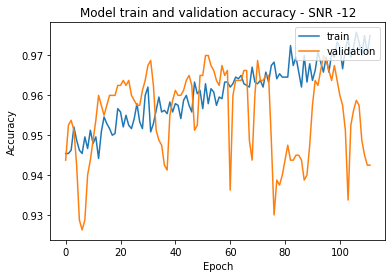

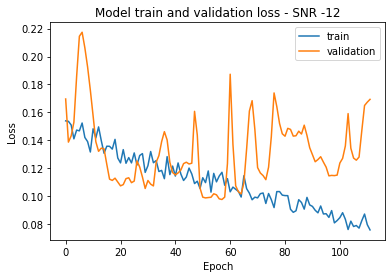

[[31.37499988]
 [26.24999881]
 [44.49999928]
 [66.12499952]
 [57.24999905]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[68.37499738 87.62500286 90.37500024 92.00000167 94.24999952  0.
   0.          0.          0.          0.        ]
 [73.25000167 82.24999905 91.87499881 94.24999952 96.49999738  0.
   0.          0.          0.          0.        ]] [[25.24999976 40.12500048 59.375      72.75000215 79.87499833  0.
   0.          0.          0.          0.        ]
 [33.50000083 49.75000024 70.24999857 83.87500048 89.99999762  0.
   0.          0.          0.          0.        ]] [[53.87499928 75.24999976 89.24999833 92.62499809 94.74999905  0.
   0.          0.          0.          0.        ]
 [53.37499976 78.87499928 93.37499738 93.87500286 95.62500119  0.
   0.          0.          0.          0.        ]]


In [ ]:
for i in range(0, 5):

  x_data_16_curr = np.reshape(x_data_16_data[:,i], (4000, 16, 16, 1))
  y_data_16_curr = to_categorical(y_labels_data[:,i].flatten())

  X_train_curr, X_test_valid_curr, Y_train_curr, Y_test_valid_curr = train_test_split(x_data_16_curr, y_data_16_curr, test_size=0.4)
  X_validation_curr, X_test_curr, Y_validation_curr, Y_test_curr = train_test_split(X_test_valid_curr, Y_test_valid_curr, test_size=0.5)

  scores_without_tf_16[i] = train_data(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, 16, i)
  scores_tf_allsnr_16[:,i] = train_data_on_all_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder_all, i)
  scores_tf_highsnr_16[:,i] = train_data_on_high_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder_high, i)
  scores_tf_lowsnr_16[:,i] = train_data_on_low_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder_low, i)

  print(scores_without_tf_16, scores_tf_allsnr_16, scores_tf_highsnr_16, scores_tf_lowsnr_16)


Training SNR = -10 Data

Epoch 1/200
3/3 [==============================] - 50s 1s/step - loss: 1.4089 - accuracy: 0.3886 - val_loss: 1.3186 - val_accuracy: 0.5025
Epoch 2/200
3/3 [==============================] - 1s 242ms/step - loss: 0.6872 - accuracy: 0.7362 - val_loss: 1.3861 - val_accuracy: 0.2412
Epoch 3/200
3/3 [==============================] - 1s 244ms/step - loss: 0.5454 - accuracy: 0.8041 - val_loss: 1.5224 - val_accuracy: 0.2450
Epoch 4/200
3/3 [==============================] - 1s 244ms/step - loss: 0.4828 - accuracy: 0.8354 - val_loss: 1.7402 - val_accuracy: 0.5050
Epoch 5/200
3/3 [==============================] - 1s 243ms/step - loss: 0.4219 - accuracy: 0.8553 - val_loss: 1.8770 - val_accuracy: 0.4512
Epoch 6/200
3/3 [==============================] - 1s 243ms/step - loss: 0.3799 - accuracy: 0.8728 - val_loss: 2.0999 - val_accuracy: 0.3162
Epoch 7/200
3/3 [==============================] - 1s 244ms/step - loss: 0.3649 - accuracy: 0.8769 - val_loss: 2.3932 - val_accura

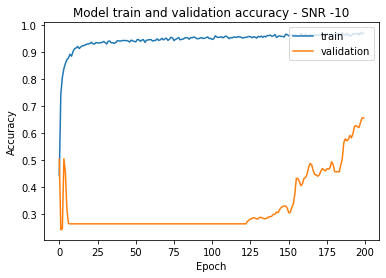

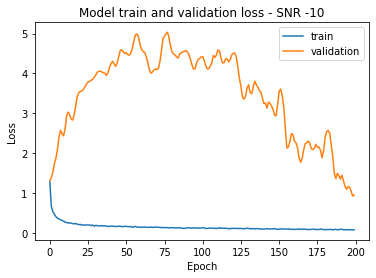


Score of SNR on All SNR model without Transfer Learning -10 = 97.12499976158142

Training SNR = -10 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 481ms/step - loss: 0.0939 - accuracy: 0.9633 - val_loss: 0.0789 - val_accuracy: 0.9638
Epoch 2/200
3/3 [==============================] - 1s 248ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 0.0835 - val_accuracy: 0.9663
Epoch 3/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0867 - accuracy: 0.9712 - val_loss: 0.0819 - val_accuracy: 0.9675
Epoch 4/200
3/3 [==============================] - 1s 251ms/step - loss: 0.0867 - accuracy: 0.9692 - val_loss: 0.0719 - val_accuracy: 0.9712
Epoch 5/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0843 - accuracy: 0.9717 - val_loss: 0.0712 - val_accuracy: 0.9737
Epoch 6/200
3/3 [==============================] - 1s 248ms/step - loss: 0.0755 - accuracy: 0.9692 - val_loss: 0.0697 - val_accuracy: 0.9737
Epoch 7/200
3/3 

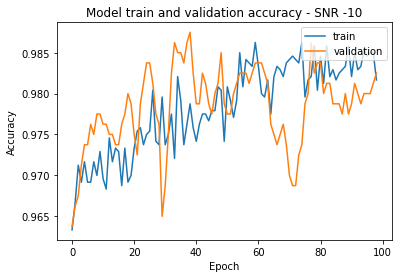

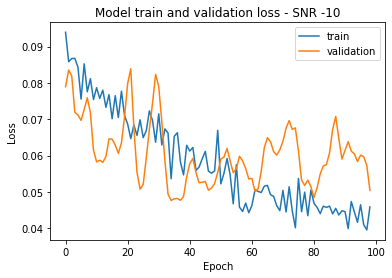

Epoch 00099: early stopping

Evaluating on Test data : Score of SNR -10 = 97.75000214576721

Score of SNR on High SNR model without Transfer Learning -10 = 89.3750011920929

Training SNR = -10 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 7s 3s/step - loss: 0.2592 - accuracy: 0.9383 - val_loss: 0.1923 - val_accuracy: 0.9500
Epoch 2/200
3/3 [==============================] - 1s 249ms/step - loss: 0.2173 - accuracy: 0.9425 - val_loss: 0.2043 - val_accuracy: 0.9438
Epoch 3/200
3/3 [==============================] - 1s 252ms/step - loss: 0.1905 - accuracy: 0.9463 - val_loss: 0.2018 - val_accuracy: 0.9425
Epoch 4/200
3/3 [==============================] - 1s 249ms/step - loss: 0.2064 - accuracy: 0.9463 - val_loss: 0.2318 - val_accuracy: 0.9362
Epoch 5/200
3/3 [==============================] - 1s 250ms/step - loss: 0.1904 - accuracy: 0.9508 - val_loss: 0.2219 - val_accuracy: 0.9325
Epoch 6/200
3/3 [==============================] - 1s 252ms/step - 

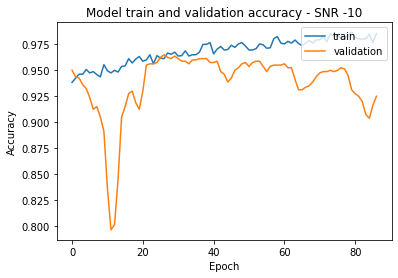

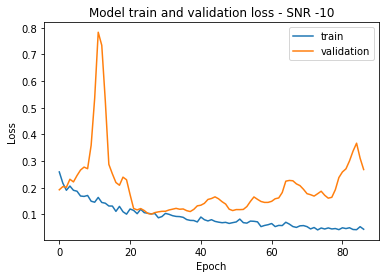

Score of SNR on low SNR model without Transfer Learning -10 = 94.62500214576721

Training SNR = -10 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 500ms/step - loss: 0.1223 - accuracy: 0.9550 - val_loss: 0.1258 - val_accuracy: 0.9575
Epoch 2/200
3/3 [==============================] - 1s 248ms/step - loss: 0.1187 - accuracy: 0.9596 - val_loss: 0.1180 - val_accuracy: 0.9588
Epoch 3/200
3/3 [==============================] - 1s 252ms/step - loss: 0.1090 - accuracy: 0.9613 - val_loss: 0.1215 - val_accuracy: 0.9675
Epoch 4/200
3/3 [==============================] - 1s 248ms/step - loss: 0.1046 - accuracy: 0.9650 - val_loss: 0.1278 - val_accuracy: 0.9650
Epoch 5/200
3/3 [==============================] - 1s 250ms/step - loss: 0.1137 - accuracy: 0.9600 - val_loss: 0.1314 - val_accuracy: 0.9650
Epoch 6/200
3/3 [==============================] - 1s 250ms/step - loss: 0.1067 - accuracy: 0.9613 - val_loss: 0.1353 - val_accuracy: 0.9625
Epoch 7/200
3/3 [

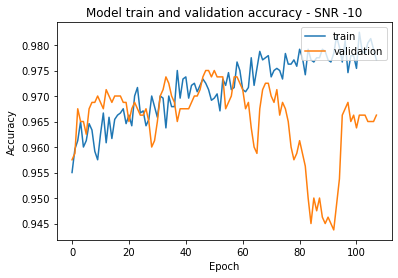

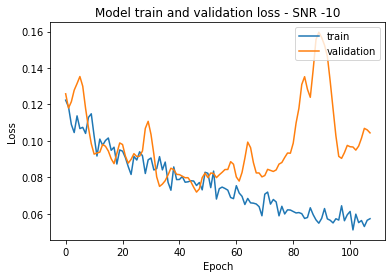

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [67.75000095]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[ 0.          0.          0.          0.          0.         97.12499976
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         97.75000215
   0.          0.          0.          0.        ]] [[ 0.          0.          0.          0.          0.         89.37500119
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         91.50000215
   0.          0.          0.          0.        ]] [[ 0.          0.          0.          0.          0.         94.62500215
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         96.62500024
   0.          0.          0.          0.        ]]

Training SNR = -8 Data

Epoch 1/200
3/3 [==============================] - 3s 482ms/step - loss

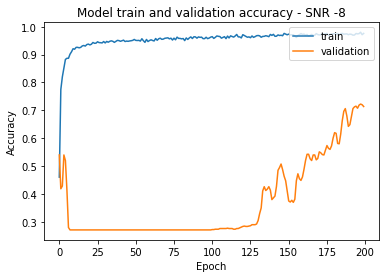

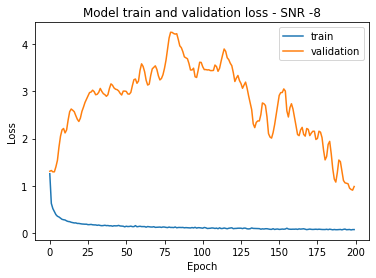


Score of SNR on All SNR model without Transfer Learning -8 = 98.1249988079071

Training SNR = -8 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 471ms/step - loss: 0.0764 - accuracy: 0.9725 - val_loss: 0.0811 - val_accuracy: 0.9700
Epoch 2/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0707 - accuracy: 0.9746 - val_loss: 0.0649 - val_accuracy: 0.9775
Epoch 3/200
3/3 [==============================] - 1s 251ms/step - loss: 0.0631 - accuracy: 0.9750 - val_loss: 0.0615 - val_accuracy: 0.9800
Epoch 4/200
3/3 [==============================] - 1s 253ms/step - loss: 0.0677 - accuracy: 0.9750 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 5/200
3/3 [==============================] - 1s 249ms/step - loss: 0.0649 - accuracy: 0.9750 - val_loss: 0.0500 - val_accuracy: 0.9850
Epoch 6/200
3/3 [==============================] - 1s 254ms/step - loss: 0.0593 - accuracy: 0.9750 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 7/200
3/3 [==

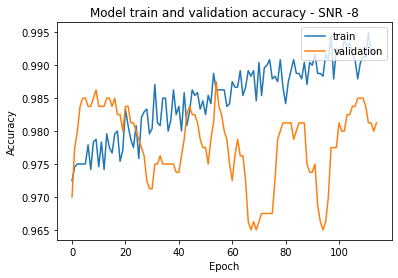

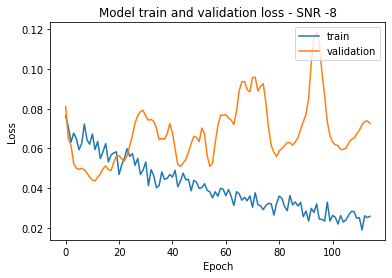

Score of SNR on High SNR model without Transfer Learning -8 = 93.62499713897705

Training SNR = -8 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 485ms/step - loss: 0.1771 - accuracy: 0.9546 - val_loss: 0.1125 - val_accuracy: 0.9750
Epoch 2/200
3/3 [==============================] - 1s 253ms/step - loss: 0.1598 - accuracy: 0.9588 - val_loss: 0.1016 - val_accuracy: 0.9725
Epoch 3/200
3/3 [==============================] - 1s 252ms/step - loss: 0.1524 - accuracy: 0.9621 - val_loss: 0.0974 - val_accuracy: 0.9725
Epoch 4/200
3/3 [==============================] - 1s 250ms/step - loss: 0.1568 - accuracy: 0.9604 - val_loss: 0.0978 - val_accuracy: 0.9750
Epoch 5/200
3/3 [==============================] - 1s 252ms/step - loss: 0.1263 - accuracy: 0.9621 - val_loss: 0.0999 - val_accuracy: 0.9737
Epoch 6/200
3/3 [==============================] - 1s 255ms/step - loss: 0.1280 - accuracy: 0.9600 - val_loss: 0.0982 - val_accuracy: 0.9725
Epoch 7/200
3/3 [

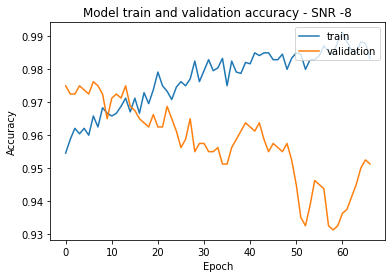

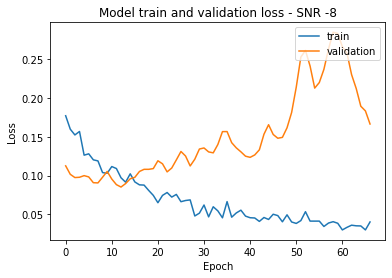

Score of SNR on low SNR model without Transfer Learning -8 = 95.74999809265137

Training SNR = -8 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 476ms/step - loss: 0.1163 - accuracy: 0.9567 - val_loss: 0.1339 - val_accuracy: 0.9550
Epoch 2/200
3/3 [==============================] - 1s 247ms/step - loss: 0.1079 - accuracy: 0.9596 - val_loss: 0.0926 - val_accuracy: 0.9725
Epoch 3/200
3/3 [==============================] - 1s 247ms/step - loss: 0.1000 - accuracy: 0.9638 - val_loss: 0.0817 - val_accuracy: 0.9737
Epoch 4/200
3/3 [==============================] - 1s 251ms/step - loss: 0.1039 - accuracy: 0.9608 - val_loss: 0.0813 - val_accuracy: 0.9775
Epoch 5/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0932 - accuracy: 0.9625 - val_loss: 0.0837 - val_accuracy: 0.9725
Epoch 6/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0933 - accuracy: 0.9663 - val_loss: 0.0854 - val_accuracy: 0.9737
Epoch 7/200
3/3 [==

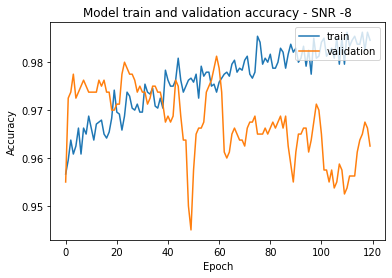

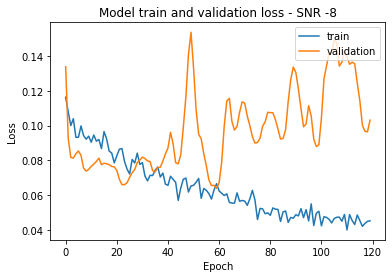

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [67.75000095]
 [71.37500048]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] [[ 0.          0.          0.          0.          0.         97.12499976
  98.12499881  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         97.75000215
  98.00000191  0.          0.          0.        ]] [[ 0.          0.          0.          0.          0.         89.37500119
  93.62499714  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         91.50000215
  96.24999762  0.          0.          0.        ]] [[ 0.          0.          0.          0.          0.         94.62500215
  95.74999809  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         96.62500024
  97.25000262  0.          0.          0.        ]]

Training SNR = -6 Data

Epoch 1/200
3/3 [==============================] - 3s 483ms/step - loss

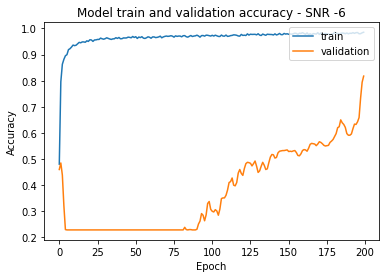

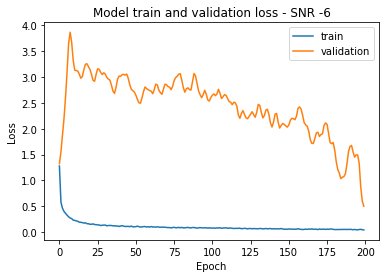


Score of SNR on All SNR model without Transfer Learning -6 = 98.7500011920929

Training SNR = -6 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 476ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0705 - val_accuracy: 0.9688
Epoch 2/200
3/3 [==============================] - 1s 251ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0663 - val_accuracy: 0.9712
Epoch 3/200
3/3 [==============================] - 1s 254ms/step - loss: 0.0532 - accuracy: 0.9825 - val_loss: 0.0592 - val_accuracy: 0.9787
Epoch 4/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0592 - val_accuracy: 0.9787
Epoch 5/200
3/3 [==============================] - 1s 257ms/step - loss: 0.0527 - accuracy: 0.9804 - val_loss: 0.0579 - val_accuracy: 0.9787
Epoch 6/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0499 - accuracy: 0.9812 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 7/200
3/3 [==

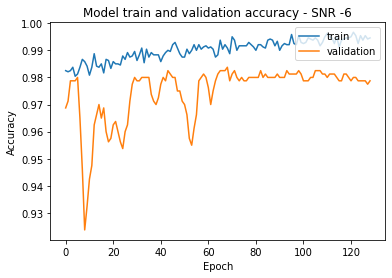

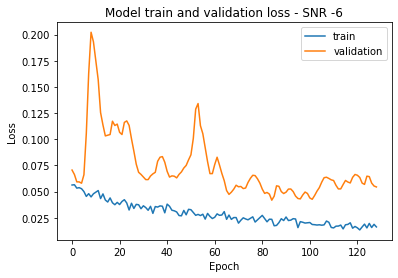

Score of SNR on High SNR model without Transfer Learning -6 = 97.12499976158142

Training SNR = -6 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 477ms/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0876 - val_accuracy: 0.9750
Epoch 2/200
3/3 [==============================] - 1s 253ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0858 - val_accuracy: 0.9737
Epoch 3/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0554 - accuracy: 0.9867 - val_loss: 0.1166 - val_accuracy: 0.9663
Epoch 4/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0617 - accuracy: 0.9812 - val_loss: 0.1790 - val_accuracy: 0.9425
Epoch 5/200
3/3 [==============================] - 1s 256ms/step - loss: 0.0592 - accuracy: 0.9829 - val_loss: 0.1490 - val_accuracy: 0.9500
Epoch 6/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0471 - accuracy: 0.9846 - val_loss: 0.1097 - val_accuracy: 0.9663
Epoch 7/200
3/3 [

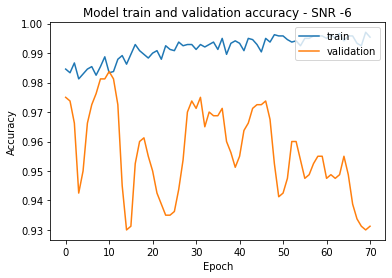

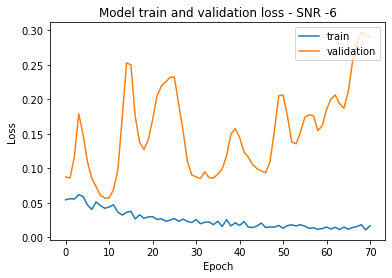

Score of SNR on low SNR model without Transfer Learning -6 = 94.74999904632568

Training SNR = -6 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 482ms/step - loss: 0.0995 - accuracy: 0.9700 - val_loss: 0.1763 - val_accuracy: 0.9350
Epoch 2/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0986 - accuracy: 0.9692 - val_loss: 0.1616 - val_accuracy: 0.9413
Epoch 3/200
3/3 [==============================] - 1s 249ms/step - loss: 0.0902 - accuracy: 0.9721 - val_loss: 0.1251 - val_accuracy: 0.9625
Epoch 4/200
3/3 [==============================] - 1s 258ms/step - loss: 0.0890 - accuracy: 0.9704 - val_loss: 0.1022 - val_accuracy: 0.9663
Epoch 5/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0867 - accuracy: 0.9692 - val_loss: 0.0947 - val_accuracy: 0.9663
Epoch 6/200
3/3 [==============================] - 1s 254ms/step - loss: 0.0816 - accuracy: 0.9746 - val_loss: 0.0883 - val_accuracy: 0.9700
Epoch 7/200
3/3 [==

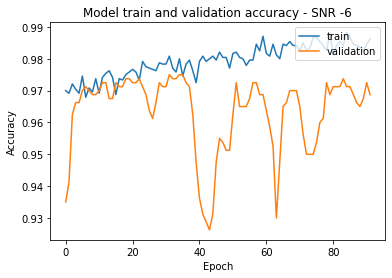

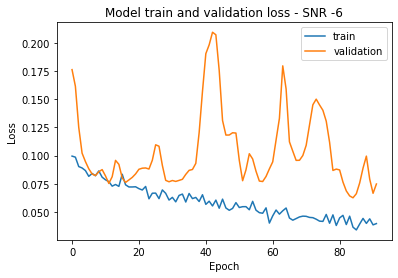

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [67.75000095]
 [71.37500048]
 [82.37500191]
 [ 0.        ]
 [ 0.        ]] [[ 0.          0.          0.          0.          0.         97.12499976
  98.12499881 98.75000119  0.          0.        ]
 [ 0.          0.          0.          0.          0.         97.75000215
  98.00000191 98.00000191  0.          0.        ]] [[ 0.          0.          0.          0.          0.         89.37500119
  93.62499714 97.12499976  0.          0.        ]
 [ 0.          0.          0.          0.          0.         91.50000215
  96.24999762 91.75000191  0.          0.        ]] [[ 0.          0.          0.          0.          0.         94.62500215
  95.74999809 94.74999905  0.          0.        ]
 [ 0.          0.          0.          0.          0.         96.62500024
  97.25000262 96.62500024  0.          0.        ]]

Training SNR = -4 Data

Epoch 1/200
3/3 [==============================] - 3s 489ms/step - loss

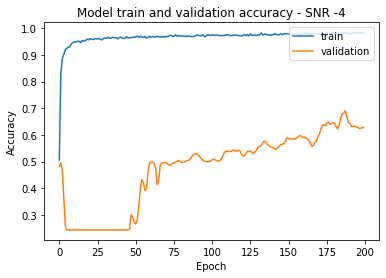

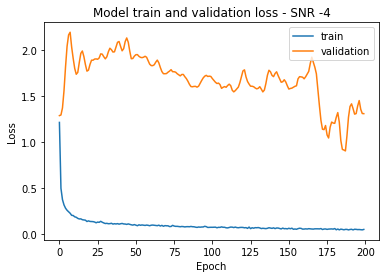


Score of SNR on All SNR model without Transfer Learning -4 = 98.62499833106995

Training SNR = -4 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 479ms/step - loss: 0.0517 - accuracy: 0.9812 - val_loss: 0.0311 - val_accuracy: 0.9887
Epoch 2/200
3/3 [==============================] - 1s 251ms/step - loss: 0.0495 - accuracy: 0.9812 - val_loss: 0.0310 - val_accuracy: 0.9887
Epoch 3/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0539 - accuracy: 0.9825 - val_loss: 0.0422 - val_accuracy: 0.9837
Epoch 4/200
3/3 [==============================] - 1s 257ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0427 - val_accuracy: 0.9837
Epoch 5/200
3/3 [==============================] - 1s 262ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0385 - val_accuracy: 0.9837
Epoch 6/200
3/3 [==============================] - 1s 256ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0410 - val_accuracy: 0.9850
Epoch 7/200
3/3 [=

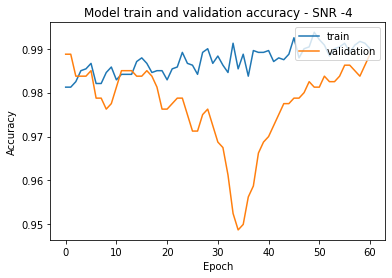

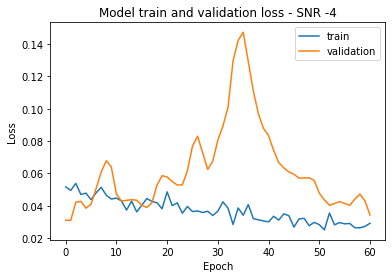

Score of SNR on High SNR model without Transfer Learning -4 = 97.62499928474426

Training SNR = -4 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 482ms/step - loss: 0.0420 - accuracy: 0.9854 - val_loss: 0.0281 - val_accuracy: 0.9900
Epoch 2/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0388 - val_accuracy: 0.9812
Epoch 3/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0573 - val_accuracy: 0.9800
Epoch 4/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0398 - accuracy: 0.9867 - val_loss: 0.0410 - val_accuracy: 0.9812
Epoch 5/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0306 - accuracy: 0.9896 - val_loss: 0.0356 - val_accuracy: 0.9800
Epoch 6/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.0341 - val_accuracy: 0.9825
Epoch 7/200
3/3 [

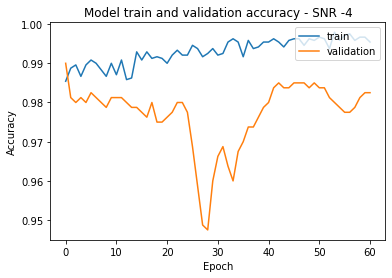

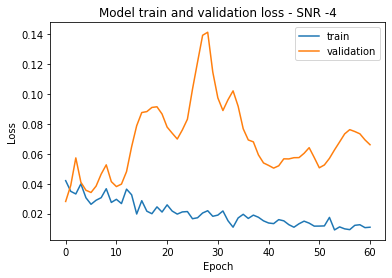

Score of SNR on low SNR model without Transfer Learning -4 = 96.49999737739563

Training SNR = -4 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 483ms/step - loss: 0.0982 - accuracy: 0.9679 - val_loss: 0.1253 - val_accuracy: 0.9613
Epoch 2/200
3/3 [==============================] - 1s 248ms/step - loss: 0.0910 - accuracy: 0.9696 - val_loss: 0.1361 - val_accuracy: 0.9613
Epoch 3/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0913 - accuracy: 0.9688 - val_loss: 0.1453 - val_accuracy: 0.9600
Epoch 4/200
3/3 [==============================] - 1s 258ms/step - loss: 0.0825 - accuracy: 0.9708 - val_loss: 0.1404 - val_accuracy: 0.9600
Epoch 5/200
3/3 [==============================] - 1s 254ms/step - loss: 0.0811 - accuracy: 0.9729 - val_loss: 0.1336 - val_accuracy: 0.9638
Epoch 6/200
3/3 [==============================] - 1s 254ms/step - loss: 0.0847 - accuracy: 0.9717 - val_loss: 0.1226 - val_accuracy: 0.9638
Epoch 7/200
3/3 [==

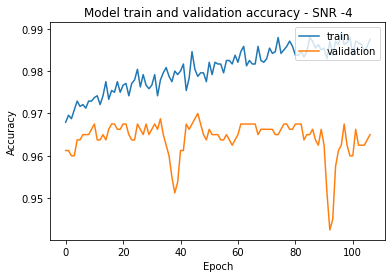

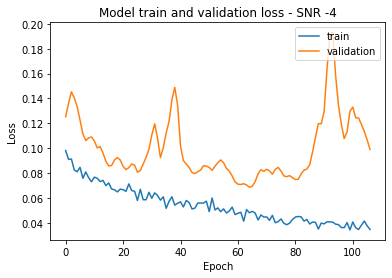

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [67.75000095]
 [71.37500048]
 [82.37500191]
 [61.50000095]
 [ 0.        ]] [[ 0.          0.          0.          0.          0.         97.12499976
  98.12499881 98.75000119 98.62499833  0.        ]
 [ 0.          0.          0.          0.          0.         97.75000215
  98.00000191 98.00000191 98.75000119  0.        ]] [[ 0.          0.          0.          0.          0.         89.37500119
  93.62499714 97.12499976 97.62499928  0.        ]
 [ 0.          0.          0.          0.          0.         91.50000215
  96.24999762 91.75000191 98.75000119  0.        ]] [[ 0.          0.          0.          0.          0.         94.62500215
  95.74999809 94.74999905 96.49999738  0.        ]
 [ 0.          0.          0.          0.          0.         96.62500024
  97.25000262 96.62500024 97.25000262  0.        ]]

Training SNR = -2 Data

Epoch 1/200
3/3 [==============================] - 3s 482ms/step - loss

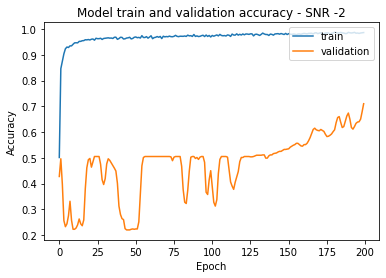

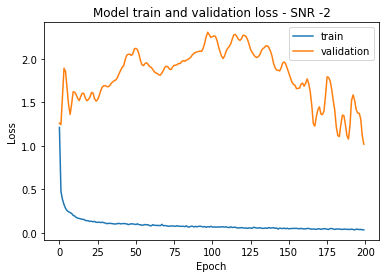


Score of SNR on All SNR model without Transfer Learning -2 = 98.62499833106995

Training SNR = -2 Data on a pre-trained All SNR model

Epoch 1/200
3/3 [==============================] - 3s 481ms/step - loss: 0.0491 - accuracy: 0.9829 - val_loss: 0.0500 - val_accuracy: 0.9862
Epoch 2/200
3/3 [==============================] - 1s 252ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0570 - val_accuracy: 0.9825
Epoch 3/200
3/3 [==============================] - 1s 251ms/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.0639 - val_accuracy: 0.9800
Epoch 4/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0469 - accuracy: 0.9837 - val_loss: 0.0655 - val_accuracy: 0.9787
Epoch 5/200
3/3 [==============================] - 1s 256ms/step - loss: 0.0400 - accuracy: 0.9850 - val_loss: 0.0608 - val_accuracy: 0.9800
Epoch 6/200
3/3 [==============================] - 1s 250ms/step - loss: 0.0405 - accuracy: 0.9850 - val_loss: 0.0502 - val_accuracy: 0.9812
Epoch 7/200
3/3 [=

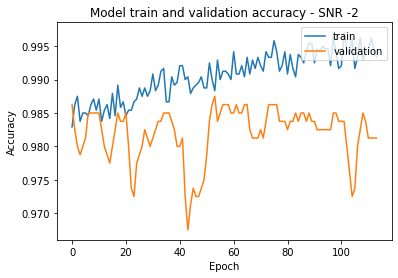

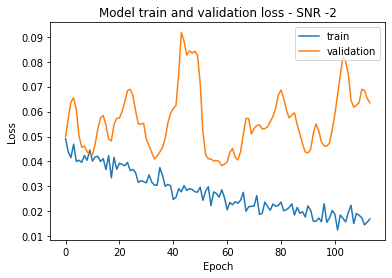

Score of SNR on High SNR model without Transfer Learning -2 = 98.50000143051147

Training SNR = -2 Data on a pre-trained High SNR model

Epoch 1/200
3/3 [==============================] - 3s 480ms/step - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.0706 - val_accuracy: 0.9800
Epoch 2/200
3/3 [==============================] - 1s 257ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 0.0556 - val_accuracy: 0.9837
Epoch 3/200
3/3 [==============================] - 1s 257ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0453 - val_accuracy: 0.9837
Epoch 4/200
3/3 [==============================] - 1s 256ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0422 - val_accuracy: 0.9837
Epoch 5/200
3/3 [==============================] - 1s 254ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0396 - val_accuracy: 0.9850
Epoch 6/200
3/3 [==============================] - 1s 261ms/step - loss: 0.0333 - accuracy: 0.9883 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 7/200
3/3 [

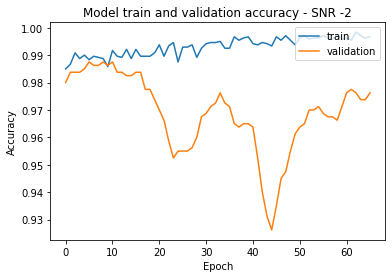

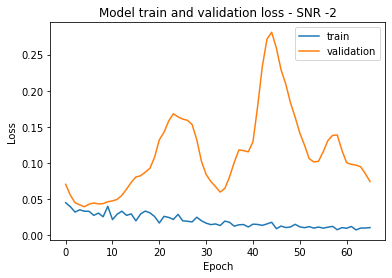

Score of SNR on low SNR model without Transfer Learning -2 = 95.49999833106995

Training SNR = -2 Data on a pre-trained Low SNR model

Epoch 1/200
3/3 [==============================] - 3s 481ms/step - loss: 0.1067 - accuracy: 0.9658 - val_loss: 0.1738 - val_accuracy: 0.9500
Epoch 2/200
3/3 [==============================] - 1s 258ms/step - loss: 0.0920 - accuracy: 0.9654 - val_loss: 0.1691 - val_accuracy: 0.9538
Epoch 3/200
3/3 [==============================] - 1s 255ms/step - loss: 0.0830 - accuracy: 0.9704 - val_loss: 0.1428 - val_accuracy: 0.9625
Epoch 4/200
3/3 [==============================] - 1s 256ms/step - loss: 0.0828 - accuracy: 0.9721 - val_loss: 0.1248 - val_accuracy: 0.9650
Epoch 5/200
3/3 [==============================] - 1s 256ms/step - loss: 0.0828 - accuracy: 0.9696 - val_loss: 0.1132 - val_accuracy: 0.9650
Epoch 6/200
3/3 [==============================] - 1s 251ms/step - loss: 0.0852 - accuracy: 0.9679 - val_loss: 0.1022 - val_accuracy: 0.9675
Epoch 7/200
3/3 [==

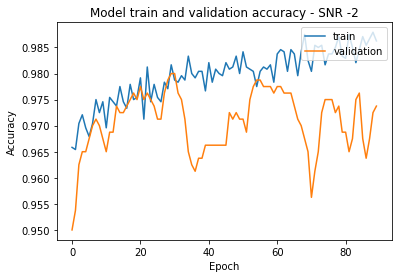

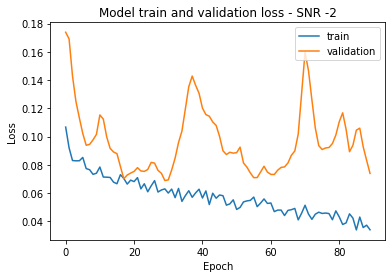

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [67.75000095]
 [71.37500048]
 [82.37500191]
 [61.50000095]
 [66.50000215]] [[ 0.          0.          0.          0.          0.         97.12499976
  98.12499881 98.75000119 98.62499833 98.62499833]
 [ 0.          0.          0.          0.          0.         97.75000215
  98.00000191 98.00000191 98.75000119 98.50000143]] [[ 0.          0.          0.          0.          0.         89.37500119
  93.62499714 97.12499976 97.62499928 98.50000143]
 [ 0.          0.          0.          0.          0.         91.50000215
  96.24999762 91.75000191 98.75000119 98.50000143]] [[ 0.          0.          0.          0.          0.         94.62500215
  95.74999809 94.74999905 96.49999738 95.49999833]
 [ 0.          0.          0.          0.          0.         96.62500024
  97.25000262 96.62500024 97.25000262 97.75000215]]


In [16]:
for i in range(5, 10):

  x_data_16_curr = np.reshape(x_data_16_data[:,i], (4000, 16, 16, 1))
  y_data_16_curr = to_categorical(y_labels_data[:,i].flatten())

  X_train_curr, X_test_valid_curr, Y_train_curr, Y_test_valid_curr = train_test_split(x_data_16_curr, y_data_16_curr, test_size=0.4)
  X_validation_curr, X_test_curr, Y_validation_curr, Y_test_curr = train_test_split(X_test_valid_curr, Y_test_valid_curr, test_size=0.5)

  scores_without_tf_16[i] = train_data(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, 16, i)
  scores_tf_allsnr_16[:,i] = train_data_on_all_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder_all, i)
  scores_tf_highsnr_16[:,i] = train_data_on_high_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder_high, i)
  scores_tf_lowsnr_16[:,i] = train_data_on_low_snr_model(X_train_curr, Y_train_curr, X_validation_curr, Y_validation_curr, X_test_curr, Y_test_curr, model_folder_low, i)

  print(scores_without_tf_16, scores_tf_allsnr_16, scores_tf_highsnr_16, scores_tf_lowsnr_16)

# Graphs and Results

## 16 x 16 SCF

In [ ]:
scores_without_tf_16 = [26.57342553, 42.51748323, 59.67366099, 72.96037078, 83.21678042, 86.71328425, 92.49417186, 94.40559149, 96.41025662, 96.96969986]
scores_tf_allsnr_16 = [[14.87179548, 21.72494233, 42.98368394, 66.57342911, 84.42890644, 90.30302763, 93.75291467, 95.6643343, 96.82983756, 97.71561623 ],
                       [32.5874120, 47.4592059,  65.87412357, 77.57575512, 85.59440374, 87.31935024, 91.84148908, 94.63869333, 96.92307711, 98.22843671]]
scores_tf_highsnr_16 = [[ 7.36596733, 6.75990656, 8.76456872, 12.63403296, 26.06060505, 54.91841435, 83.82284641, 95.01165748, 97.94871807, 98.83449674],
                        [25.82750618, 39.95338082, 58.22843909, 74.07925129, 84.0093255, 86.66666746, 90.53612947, 92.02797413, 94.12587285, 97.57575989]]
scores_tf_lowsnr_16 = [[35.19813418, 49.60373044, 72.02796936, 82.19113946, 87.0862484, 87.0862484, 89.13753033, 91.1421895, 91.00233316, 92.49417186],
                        [34.21911299, 49.93006885, 68.2051301, 78.18182111, 85.59440374, 87.55244613, 92.63403416, 95.85081339, 96.96969986, 97.76223898]]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 7, 7)
plt.plot(x,scores_without_tf_16,'-o', x, scores_tf_allsnr_16[1],'-.*', x, scores_tf_lowsnr_16[1],'-.x', x, scores_tf_highsnr_16[1], '-.+')
plt.title('CNN: 16 x 16 SCF data Classification vs SNR')
plt.xlabel('Signal to Noise Ratio - SNR (dB)')
plt.ylabel('Classification Accuracy (%)')
plt.legend(['Without Tf','All SNR Tf','Low SNR Tf', 'High SNR Tf'], loc='best', bbox_to_anchor=(1,0.35))
plt.xticks(x)
plt.yticks([0,20,40,60,80,100])
plt.rcParams.update({'font.size': 10})
plt.grid()
plt.show()

In [ ]:
y = [scores_tf_allsnr_2d[0], scores_tf_lowsnr_2d[0], scores_tf_highsnr_2d[0]]
r = np.arange(7)
width = 0.25  
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
plt.bar(r, y[0], color = 'y', width = width)
plt.bar(r - width, y[1], color = 'b', width = width)
plt.bar(r + width, y[2], color = 'r', width = width)
plt.xlabel('Signal to Noise Ratio - SNR (dB)')
plt.ylabel('Score (%)')
plt.title('CNN: Scores of All, High, and Low SNR models on 16 x 16 data')
plt.legend(['Low SNR','All SNR', 'High SNR'])
x = np.linspace(1, 7, 7)
plt.yticks([0,20,40,60,80,100])
plt.xticks(r, x)
plt.grid()
plt.show()